In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

In [7]:
warnings.filterwarnings("ignore")

In [8]:
import os

base_dir = os.getcwd()

df = pd.read_csv(f"{base_dir}/iris.csv")

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

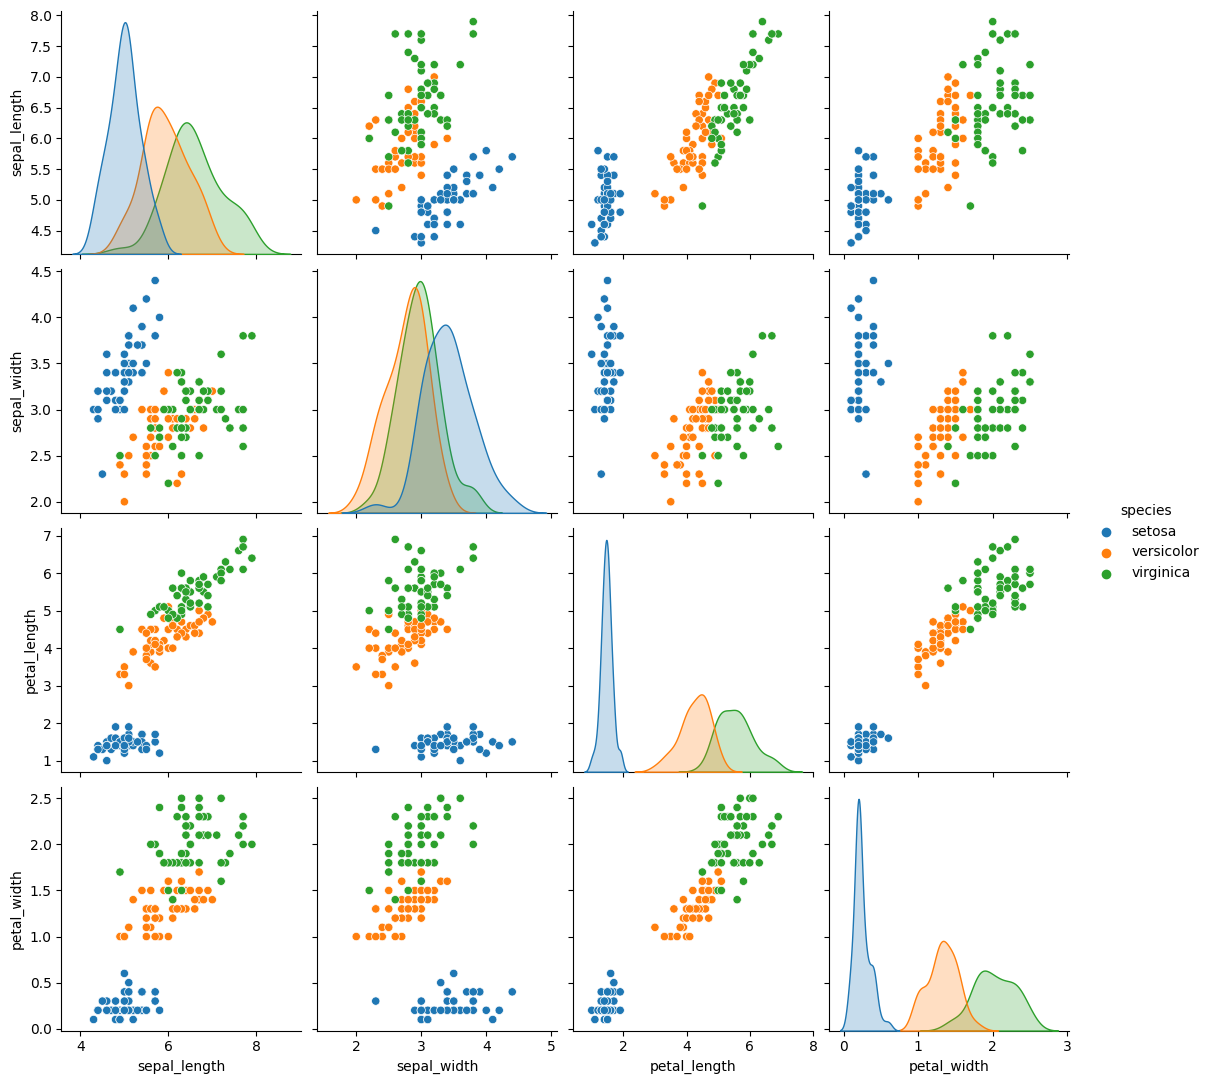

In [12]:
sns.pairplot(df, hue="species", height=2.75)

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

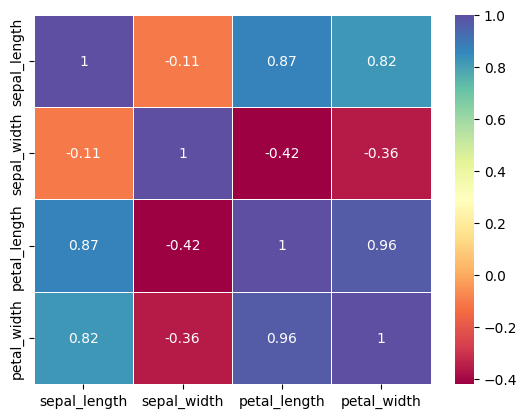

In [14]:
sns.heatmap(df.corr(), annot=True, cmap="Spectral", linewidths=0.5)

In [15]:
df['species_num'] = df['species'].replace("setosa", 1).replace("versicolor", 2).replace("virginica", 3)

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


<AxesSubplot:>

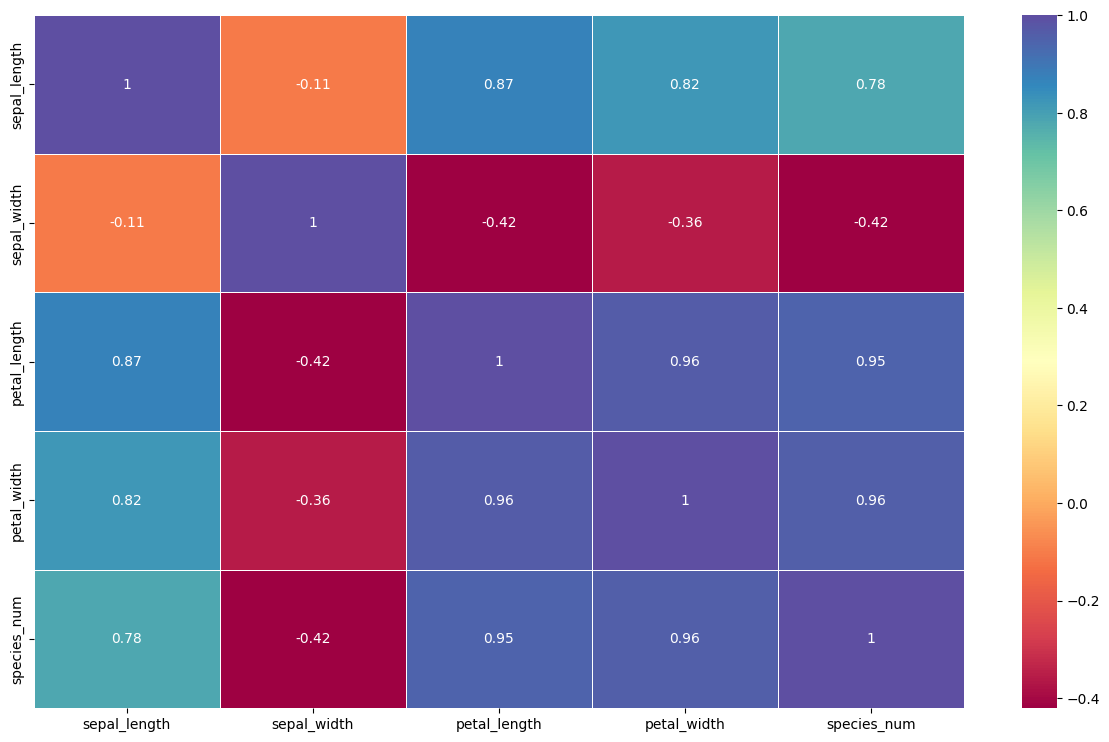

In [17]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap="Spectral", linewidths=0.5)

In [18]:
df.drop(["petal_length"], axis=1, inplace=True)

In [19]:
df.head()

,sepal_length,sepal_width,petal_width,species,species_num
0,5.1,3.5,0.2,setosa,1
1,4.9,3.0,0.2,setosa,1
2,4.7,3.2,0.2,setosa,1
3,4.6,3.1,0.2,setosa,1
4,5.0,3.6,0.2,setosa,1


In [20]:
X = df.drop(["species"], axis=1)
y = df["species"]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [24]:
compare_dict = {"actual": y_test, "pred": y_pred}
df_compare = pd.DataFrame(compare_dict)

In [25]:
df_compare.head()

,actual,pred
73,versicolor,versicolor
18,setosa,setosa
118,virginica,virginica
78,versicolor,versicolor
76,versicolor,versicolor


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, y_pred)

1.0

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cv_scores = cross_val_score(estimator=dt_model, X=X_train, y=y_train, cv=10)
cv_scores.mean()

1.0

In [30]:
from sklearn.tree import plot_tree

In [31]:
features = list(df.columns[:-1])
targets = ["setosa", "versicolor", "virginica"]


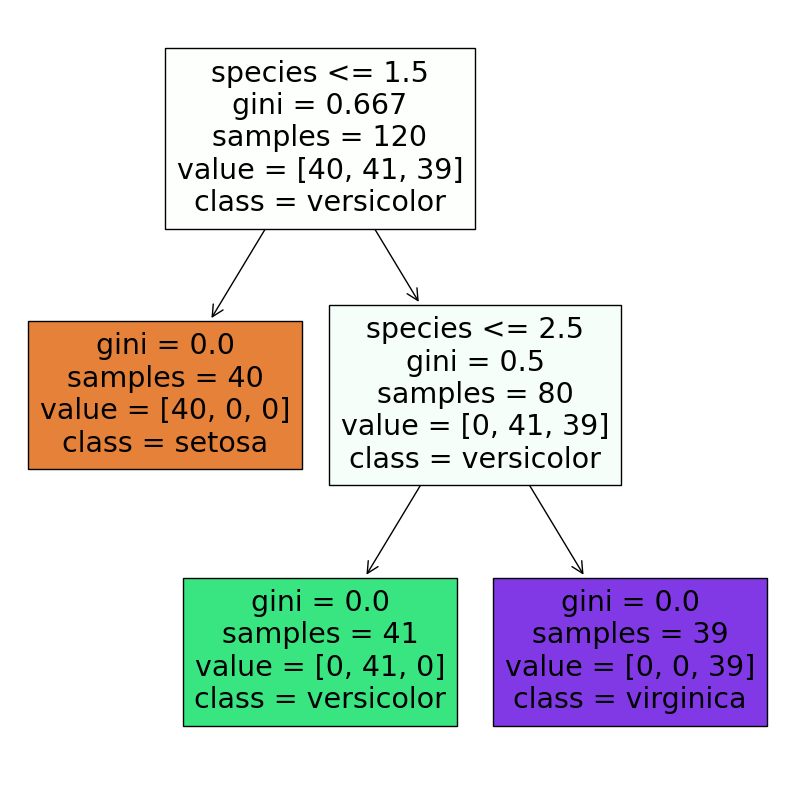

In [32]:
plt.figure(figsize=(10, 10))
tree2 = plot_tree(decision_tree=dt_model, filled=True, feature_names=features, class_names=targets)

In [43]:
from sklearn.model_selection import GridSearchCV

In [36]:
dt_model2 = DecisionTreeClassifier()
params = {"criterion": ["gini", "entropy"],
          "max_depth": np.arange(2, 14, 2),
          "max_features": ["auto", "sqrt", "log2"]}

In [38]:
dt_cv_model = GridSearchCV(estimator=dt_model2, param_grid=params, cv=10)

In [39]:
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [40]:
dt_cv_model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier()

In [34]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = rf_model.predict(X_test)


In [36]:
accuracy_score(y_test, y_pred)

1.0

In [37]:
cv_scores = cross_val_score(estimator=rf_model, X=X_train, y=y_train, cv=10)
cv_scores.mean()

1.0

In [39]:
rf_model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1649962503),
 DecisionTreeClassifier(max_features='auto', random_state=470683308),
 DecisionTreeClassifier(max_features='auto', random_state=376265894),
 DecisionTreeClassifier(max_features='auto', random_state=1698339868),
 DecisionTreeClassifier(max_features='auto', random_state=1980062933),
 DecisionTreeClassifier(max_features='auto', random_state=312049810),
 DecisionTreeClassifier(max_features='auto', random_state=381222366),
 DecisionTreeClassifier(max_features='auto', random_state=1151760969),
 DecisionTreeClassifier(max_features='auto', random_state=274836149),
 DecisionTreeClassifier(max_features='auto', random_state=979950132),
 DecisionTreeClassifier(max_features='auto', random_state=1926117216),
 DecisionTreeClassifier(max_features='auto', random_state=995766219),
 DecisionTreeClassifier(max_features='auto', random_state=160560270),
 DecisionTreeClassifier(max_features='auto', random_state=417199247),
 DecisionTreeCl

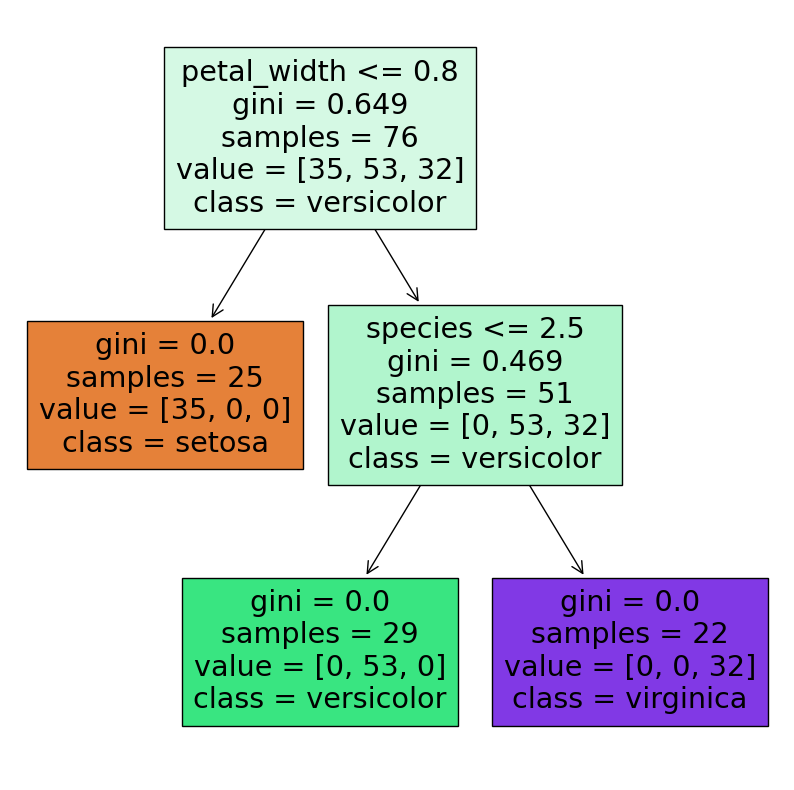

In [41]:
plt.figure(figsize=(10, 10))
tree2 = plot_tree(decision_tree=rf_model.estimators_[2], filled=True, feature_names=features, class_names=targets)

In [44]:
rf_model2 = RandomForestClassifier()

In [45]:
rf_params = {"n_estimators": [50, 100, 300],
             "max_depth": [3, 5, 7],
             "max_features": [2, 4, 6, 8],
             "min_samples_split": [2, 4, 6]}

In [48]:
rf_cv_model = GridSearchCV(rf_model2, rf_params, cv=5, n_jobs=-1)

In [49]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 300]})

In [50]:
rf_cv_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}